<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [11]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

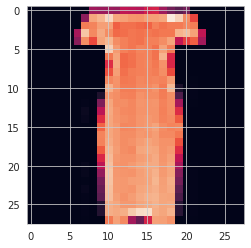

In [14]:
plt.imshow(X_train[51])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [16]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [79]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))  

model.add(BatchNormalization())

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))  

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 14812)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)


In [83]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 153s 81ms/step - loss: 0.3705 - accuracy: 0.8701 - val_loss: 0.3097 - val_accuracy: 0.8898
Epoch 2/20
1875/1875 [==============================] - 148s 79ms/step - loss: 0.2277 - accuracy: 0.9152 - val_loss: 0.2981 - val_accuracy: 0.8941
Epoch 3/20
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1746 - accuracy: 0.9356 - val_loss: 0.2779 - val_accuracy: 0.9104
Epoch 4/20
1875/1875 [==============================] - 146s 78ms/step - loss: 0.1354 - accuracy: 0.9495 - val_loss: 0.2676 - val_accuracy: 0.9121
Epoch 5/20
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1029 - accuracy: 0.9614 - val_loss: 0.3042 - val_accuracy: 0.9141
Epoch 6/20
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0792 - accuracy: 0.9704 - val_loss: 0.3438 - val_accuracy: 0.9124


**TASK 7: Plot values of metrics you used in your model.**

In [84]:
model.metrics_names

['loss', 'accuracy']

In [85]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.371,0.870,0.310,0.890
1,0.228,0.915,0.298,0.894
2,0.175,0.936,0.278,0.910
3,0.135,0.950,0.268,0.912
4,0.103,0.961,0.304,0.914


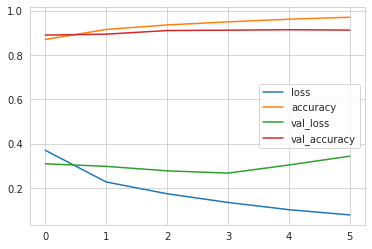

In [102]:
summary.plot();

In [ ]:
summary[["loss", "val_loss"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.2676 - accuracy: 0.9121


[0.2676216959953308, 0.9121000170707703]

In [91]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2676216959953308
Test accuracy: 0.9121000170707703


In [92]:
pred_prob = model.predict(X_test)
pred_prob

array([[5.44326750e-15, 2.57934462e-13, 5.55924610e-13, ...,
        1.90626520e-06, 1.08344143e-08, 9.99997854e-01],
       [3.82728431e-05, 1.37244244e-11, 9.99872804e-01, ...,
        1.46293386e-08, 1.42695129e-07, 4.37680410e-06],
       [1.69295567e-11, 9.99999881e-01, 2.85123175e-10, ...,
        9.99479492e-12, 1.11671966e-07, 3.48030021e-10],
       ...,
       [3.35776372e-11, 1.53477647e-11, 1.56338698e-09, ...,
        3.81960305e-12, 9.99999881e-01, 1.67742046e-12],
       [1.71672225e-11, 1.00000000e+00, 7.76221754e-09, ...,
        6.80857315e-11, 3.38642692e-09, 3.29894972e-10],
       [1.25612687e-05, 1.94966793e-10, 6.14352189e-07, ...,
        6.84076576e-06, 1.08879494e-05, 1.44846081e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [96]:
(y_test != y_pred).sum()

879

## Prediction

In [97]:
sample = X_test[3]

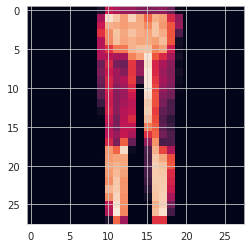

In [98]:
plt.imshow(sample.reshape(28,28));

In [ ]:
pred_prob = model.predict(sample.reshape(1,28,28,1))
pred_prob

In [100]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [101]:
classes[1]

'Trouser'

# End of Assignment